In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score

In [2]:
banco = pd.read_csv('Dataset_Total.csv',sep=',')
print('Tamanho: ' + str(banco.shape))
banco.head()

Tamanho: (1520, 19)


,Ano,Rodada,Mandante,Gols_Mandante,Gols_Visitante,Visitante,Vencedor,TC-Empates_Casa,TC-Jogos_Fora,TC-Derrotas_Fora,TC-Valor,TC-Pontos,TV-Vitorias_Casa,TV-Derrotas_Casa,TV-Gols_Casa,TV-Gols_Fora,TV-Gols_Sofridos,TV-Valor,TV-Pontos
0,2015,1,Chapecoense,2,1,Coritiba,1,0,0,0,8.20,0,0,0,0,0,0,17.55,0
1,2015,1,Palmeiras,2,2,Atletico-MG,0,0,0,0,61.95,0,0,0,0,0,0,53.93,0
2,2015,1,Fluminense,1,0,Joinville,1,0,0,0,66.35,0,0,0,0,0,0,25.67,0
3,2015,1,Gremio,3,3,Ponte Preta,0,0,0,0,39.48,0,0,0,0,0,0,9.10,0
4,2015,1,Cruzeiro,0,1,Corinthians,2,0,0,0,63.25,0,0,0,0,0,0,53.80,0


In [3]:
remove =['Ano','Gols_Mandante','Gols_Visitante','Mandante','Visitante']

In [4]:
bd =  banco.drop(remove,axis=1)
bd.head()

,Rodada,Vencedor,TC-Empates_Casa,TC-Jogos_Fora,TC-Derrotas_Fora,TC-Valor,TC-Pontos,TV-Vitorias_Casa,TV-Derrotas_Casa,TV-Gols_Casa,TV-Gols_Fora,TV-Gols_Sofridos,TV-Valor,TV-Pontos
0,1,1,0,0,0,8.20,0,0,0,0,0,0,17.55,0
1,1,0,0,0,0,61.95,0,0,0,0,0,0,53.93,0
2,1,1,0,0,0,66.35,0,0,0,0,0,0,25.67,0
3,1,0,0,0,0,39.48,0,0,0,0,0,0,9.10,0
4,1,2,0,0,0,63.25,0,0,0,0,0,0,53.80,0


## Matriz de correlação

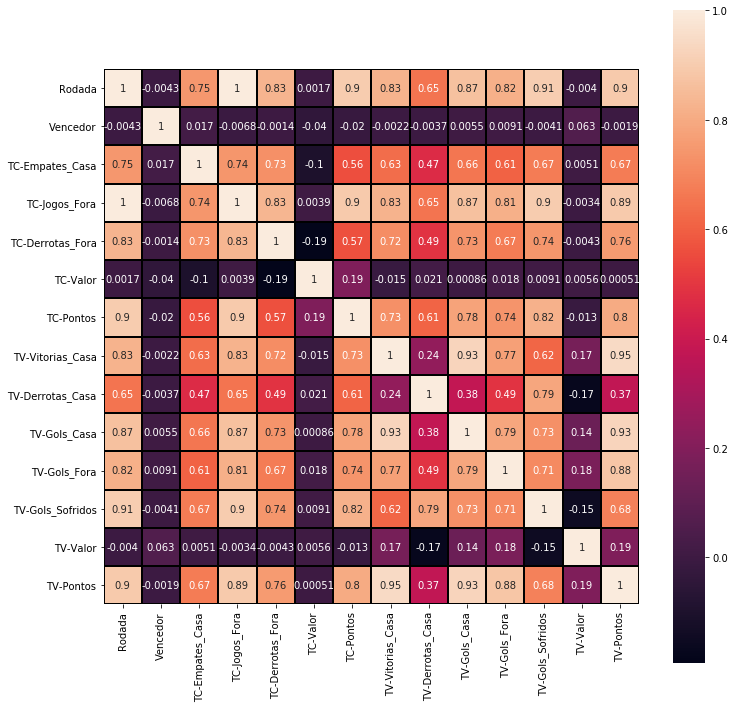

In [5]:
plt.figure(figsize=(12,12));
sns.heatmap(bd.corr(), square=True ,annot=True, linewidths=1, linecolor='k');

In [6]:
bd.columns

Index(['Rodada', 'Vencedor', 'TC-Empates_Casa', 'TC-Jogos_Fora',
       'TC-Derrotas_Fora', 'TC-Valor', 'TC-Pontos', 'TV-Vitorias_Casa',
       'TV-Derrotas_Casa', 'TV-Gols_Casa', 'TV-Gols_Fora', 'TV-Gols_Sofridos',
       'TV-Valor', 'TV-Pontos'],
      dtype='object')

In [7]:
recursos = ['Rodada', 'TC-Empates_Casa', 'TC-Jogos_Fora',
       'TC-Derrotas_Fora', 'TC-Valor', 'TC-Pontos', 'TV-Vitorias_Casa',
       'TV-Derrotas_Casa', 'TV-Gols_Casa', 'TV-Gols_Fora', 'TV-Gols_Sofridos',
       'TV-Valor', 'TV-Pontos']
bd.columns

Index(['Rodada', 'Vencedor', 'TC-Empates_Casa', 'TC-Jogos_Fora',
       'TC-Derrotas_Fora', 'TC-Valor', 'TC-Pontos', 'TV-Vitorias_Casa',
       'TV-Derrotas_Casa', 'TV-Gols_Casa', 'TV-Gols_Fora', 'TV-Gols_Sofridos',
       'TV-Valor', 'TV-Pontos'],
      dtype='object')

In [8]:
X = pd.DataFrame(bd, columns=recursos)
y = pd.DataFrame(bd,columns=['Vencedor'])

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

### Regressão Logística

In [10]:
from sklearn.linear_model import LogisticRegression

modelo_rl = LogisticRegression(random_state=0,solver='lbfgs',multi_class='multinomial',max_iter=1000)
modelo_rl.fit(X_train,y_train.values.reshape(-1,))
pred = modelo_rl.predict(X_test)

print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

[[  1  75   4]
 [  0 157   6]
 [  1  55   5]]
              precision    recall  f1-score   support

           0       0.50      0.01      0.02        80
           1       0.55      0.96      0.70       163
           2       0.33      0.08      0.13        61

    accuracy                           0.54       304
   macro avg       0.46      0.35      0.28       304
weighted avg       0.49      0.54      0.41       304



### Árvore de Decisão

In [11]:
from sklearn.tree import DecisionTreeClassifier

modelo = DecisionTreeClassifier(random_state=0)
modelo.fit(X_train,y_train)
pred_tree = modelo.predict(X_test)
print(confusion_matrix(y_test,pred_tree))  
print(classification_report(y_test,pred_tree))

[[17 48 15]
 [53 70 40]
 [14 32 15]]
              precision    recall  f1-score   support

           0       0.20      0.21      0.21        80
           1       0.47      0.43      0.45       163
           2       0.21      0.25      0.23        61

    accuracy                           0.34       304
   macro avg       0.29      0.30      0.29       304
weighted avg       0.35      0.34      0.34       304



### Importância das colunas usando Árvore de Decisão

In [12]:
features_importance = zip(modelo.feature_importances_,recursos)
for importancia,recurso in sorted(features_importance, reverse=True):
    print("%s: %.2f%%" % (recurso, importancia*100))

TV-Valor: 14.99%
TC-Valor: 11.22%
TV-Gols_Casa: 11.06%
TV-Gols_Sofridos: 10.11%
TC-Pontos: 8.29%
TV-Pontos: 7.51%
TC-Derrotas_Fora: 7.30%
Rodada: 6.79%
TV-Gols_Fora: 6.47%
TC-Empates_Casa: 5.45%
TV-Derrotas_Casa: 4.70%
TC-Jogos_Fora: 3.13%
TV-Vitorias_Casa: 2.98%


### Random Forest

In [13]:
from sklearn.ensemble import RandomForestClassifier

modelo = RandomForestClassifier(random_state=1)
modelo.fit(X_train,y_train.values.reshape(-1,))

pred_forest = modelo.predict(X_test)
mae = mean_absolute_error(pred_forest,y_test)

print(confusion_matrix(y_test,pred_forest))  
print(classification_report(y_test,pred_forest))

print("Validation MAE for Random Forest Model: {}".format(mae))
print("Precisão do modelo: ",modelo.score(X_train,y_train))

[[  8  64   8]
 [ 27 122  14]
 [  7  48   6]]
              precision    recall  f1-score   support

           0       0.19      0.10      0.13        80
           1       0.52      0.75      0.61       163
           2       0.21      0.10      0.13        61

    accuracy                           0.45       304
   macro avg       0.31      0.32      0.29       304
weighted avg       0.37      0.45      0.39       304

Validation MAE for Random Forest Model: 0.6019736842105263
Precisão do modelo:  1.0
